In [1]:
tracks={}
for no in ['A','B','C','D']:
    tracks[no] = pd.read_csv("dataset/track_" + no + ".csv", parse_dates=["date"])

In [2]:
for no in ['A','B','C','D']:
    tracks[no] = tracks[no][['date', 'キロ程', '高低左', '高低右', '水準']]
    tracks[no]['高低左'] = tracks[no]['高低左'].astype('float16')
    tracks[no]['高低右'] = tracks[no]['高低右'].astype('float16')
    tracks[no]['水準'] = tracks[no]['水準'].astype('float16')

In [3]:
tracks['A'].head()
tracks['A'].info()

,date,キロ程,高低左,高低右,水準
0,2017-04-01,10000,-1.160156,-0.229980,0.830078
1,2017-04-01,10001,-1.169922,-0.300049,0.669922
2,2017-04-01,10002,-1.089844,-0.189941,0.500000
3,2017-04-01,10003,-0.640137,0.199951,0.459961
4,2017-04-01,10004,0.469971,0.890137,0.620117


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10185690 entries, 0 to 10185689
Data columns (total 5 columns):
date    datetime64[ns]
キロ程     int64
高低左     float16
高低右     float16
水準      float16
dtypes: datetime64[ns](1), float16(3), int64(1)
memory usage: 213.7 MB


In [6]:
import datetime
from tqdm import tqdm
import random
import sys

In [4]:
def get_day(dates):
    day = [(date - datetime.datetime(2017, 4, 1)).days for date in dates]
    return day

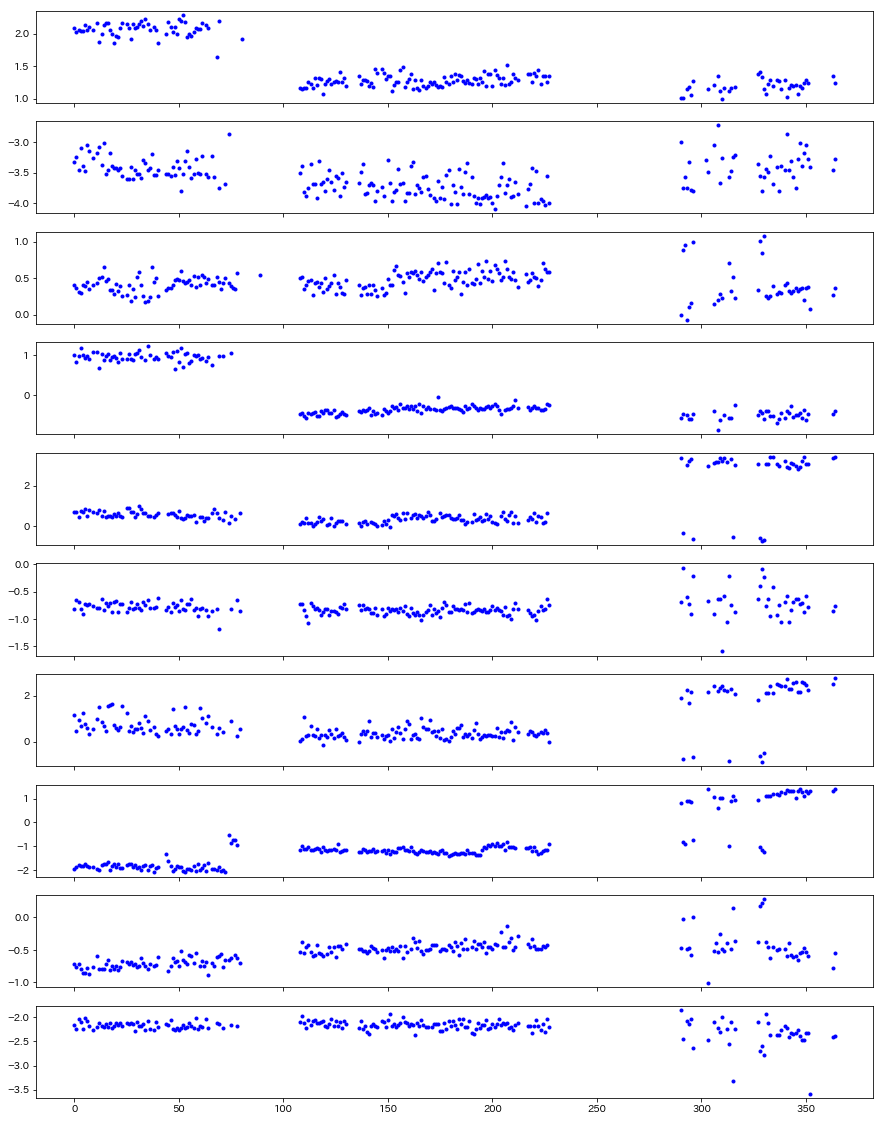

In [8]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['C']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低左'], marker='.', linewidth=0, c='b')

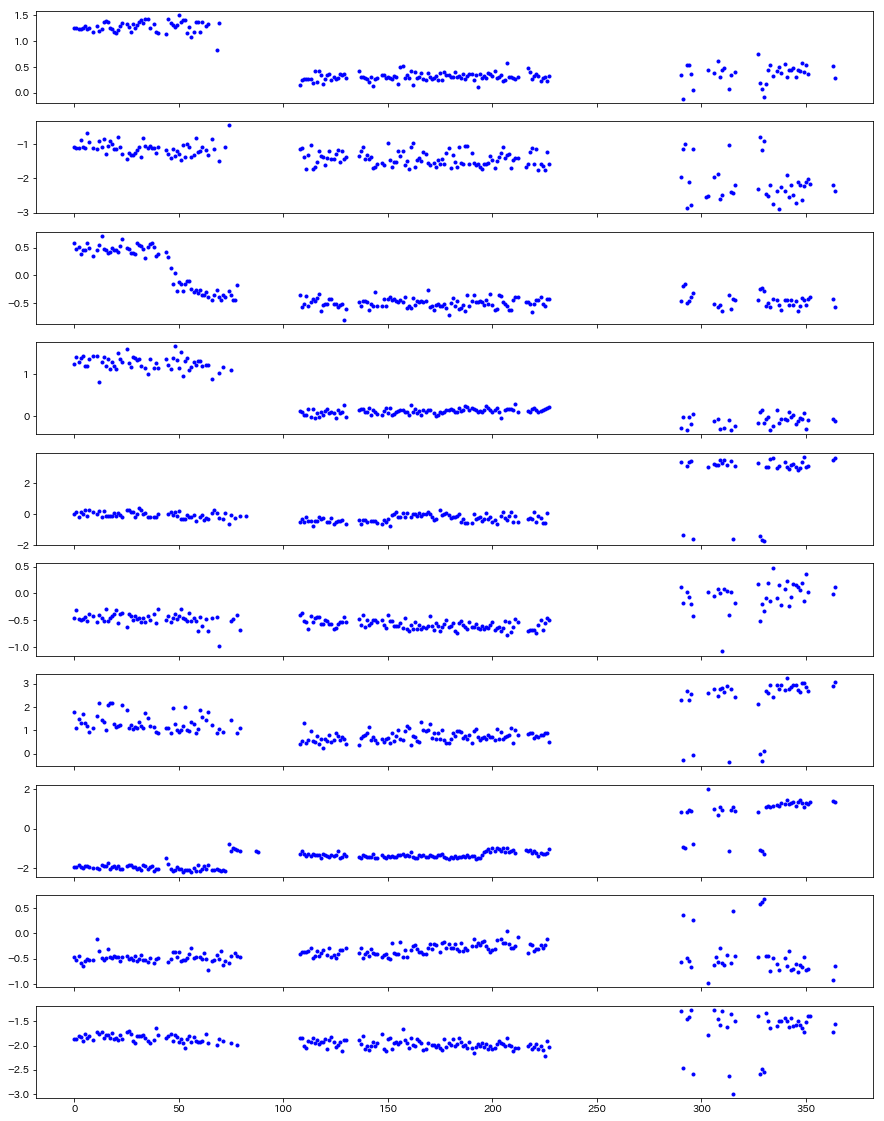

In [9]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['C']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低右']]
    data = data.dropna(subset=['高低右'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低右'], marker='.', linewidth=0, c='b')

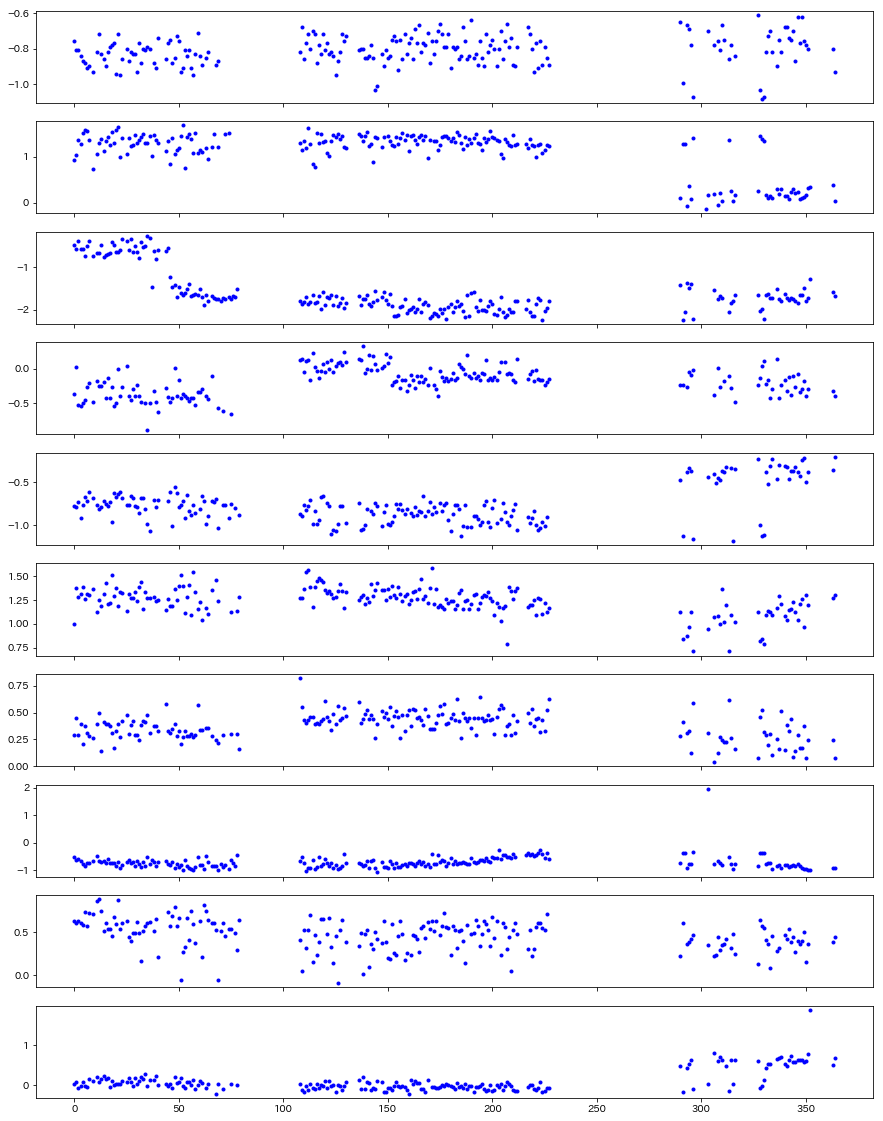

In [10]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['C']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '水準']]
    data = data.dropna(subset=['水準'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['水準'], marker='.', linewidth=0, c='b')

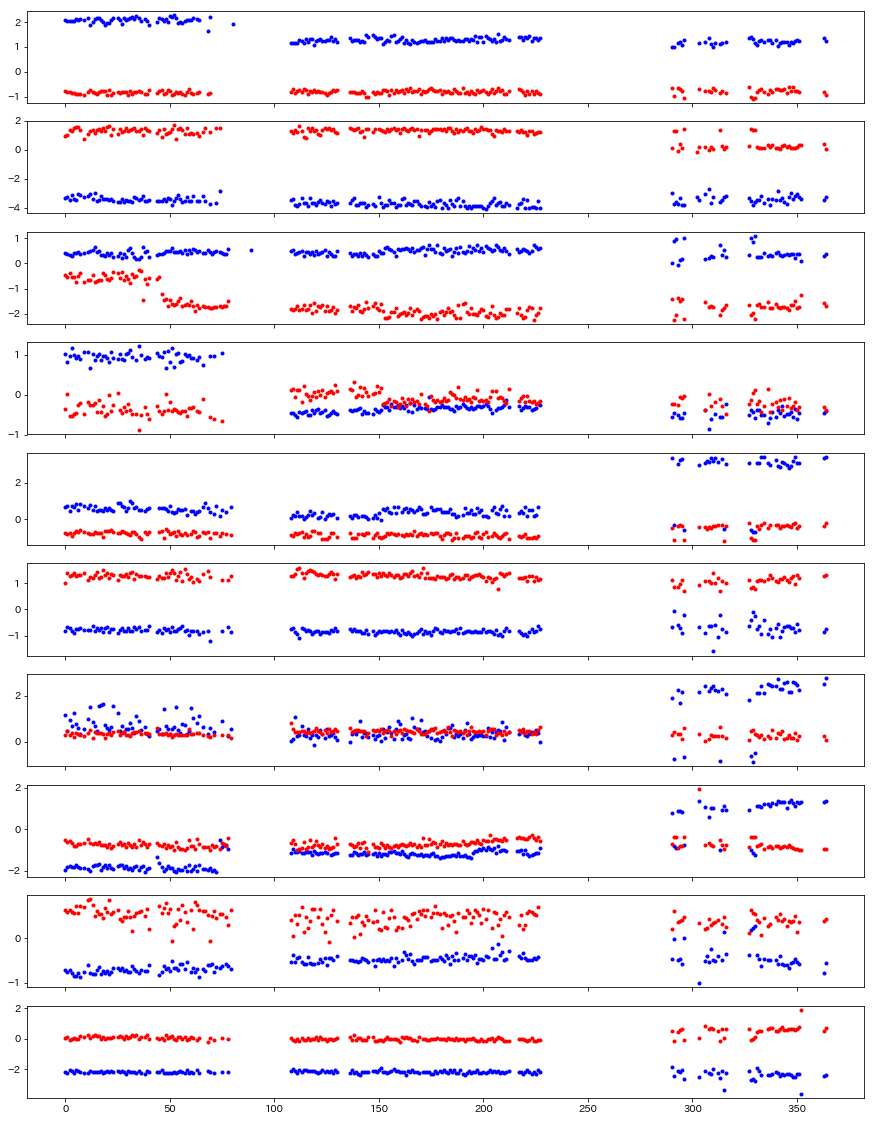

In [34]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['C']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左', '水準']]
#     data = data.dropna(subset=['高低左'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data['day'], data['水準'], marker='.', linewidth=0, c='r')

In [31]:
track = tracks['A']
track['高低左ma'] = track['高低左'].rolling(window=3, min_periods=1, center=True).mean()*1.5 - track['高低左']*0.5
track['水準+高低右+高低右ma'] = track['水準'] + track['高低右'] + track['高低右'].rolling(window=3, min_periods=1, center=True).mean()*1.5 - track['高低右']*0.5
track['高低左replace'] = track['水準+高低右+高低右ma'] - track['高低左ma']

In [32]:
track.head()

,date,キロ程,高低左,高低右,水準,高低左ma,水準+高低右+高低右ma,高低左replace,-水準+高低右+高低右ma,高低左replace1,高低左replace2
0,2017-04-01,10000,-1.160156,-0.229980,0.830078,-1.167480,0.317566,1.485046,-1.343079,1.485046,-0.175598
1,2017-04-01,10001,-1.169922,-0.300049,0.669922,-1.125000,0.159912,1.284912,-1.179688,1.284912,-0.054688
2,2017-04-01,10002,-1.089844,-0.189941,0.500000,-0.905029,0.260010,1.165039,-0.739990,1.165039,0.165039
3,2017-04-01,10003,-0.640137,0.199951,0.459961,-0.309937,1.010254,1.320190,0.090088,1.320190,0.400024
4,2017-04-01,10004,0.469971,0.890137,0.620117,0.729736,2.424683,1.694946,1.184937,1.694946,0.455200


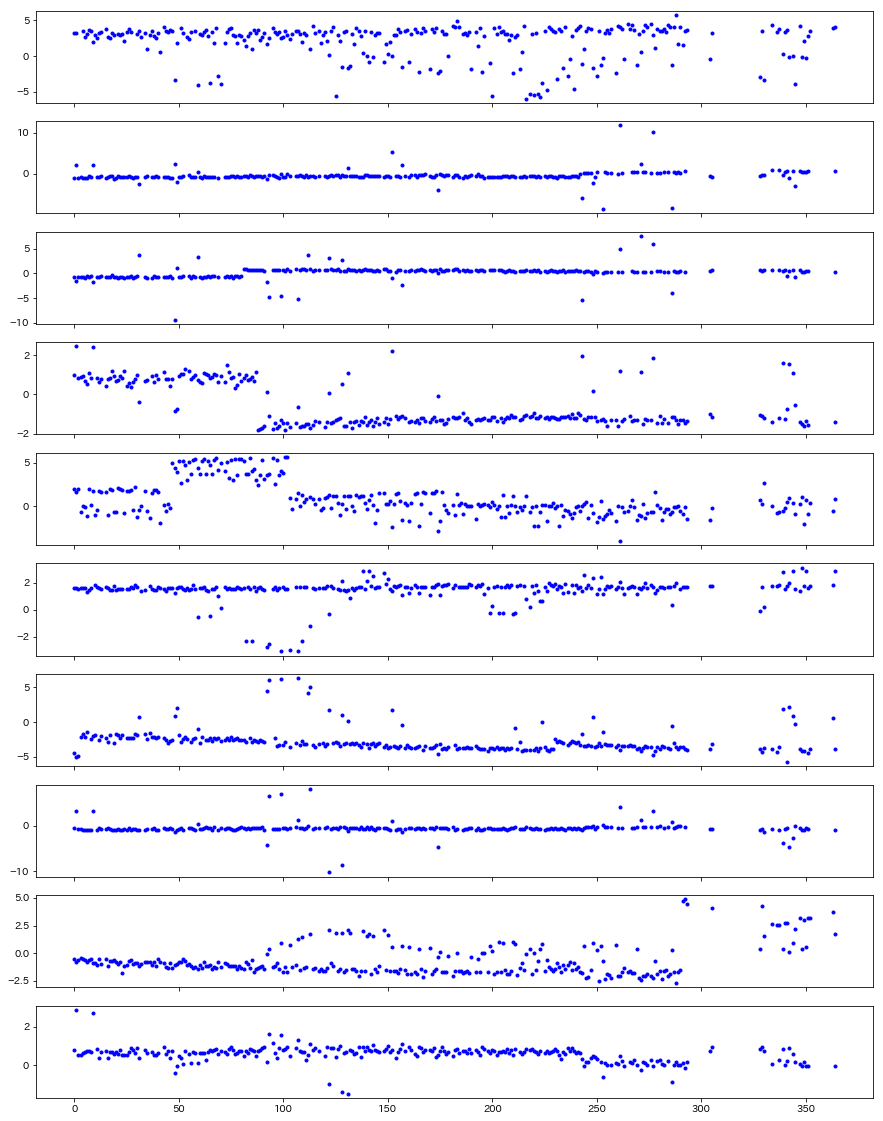

In [26]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '水準+高低右+高低右ma']]
    data = data.dropna(subset=['水準+高低右+高低右ma'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['水準+高低右+高低右ma'], marker='.', linewidth=0, c='b')

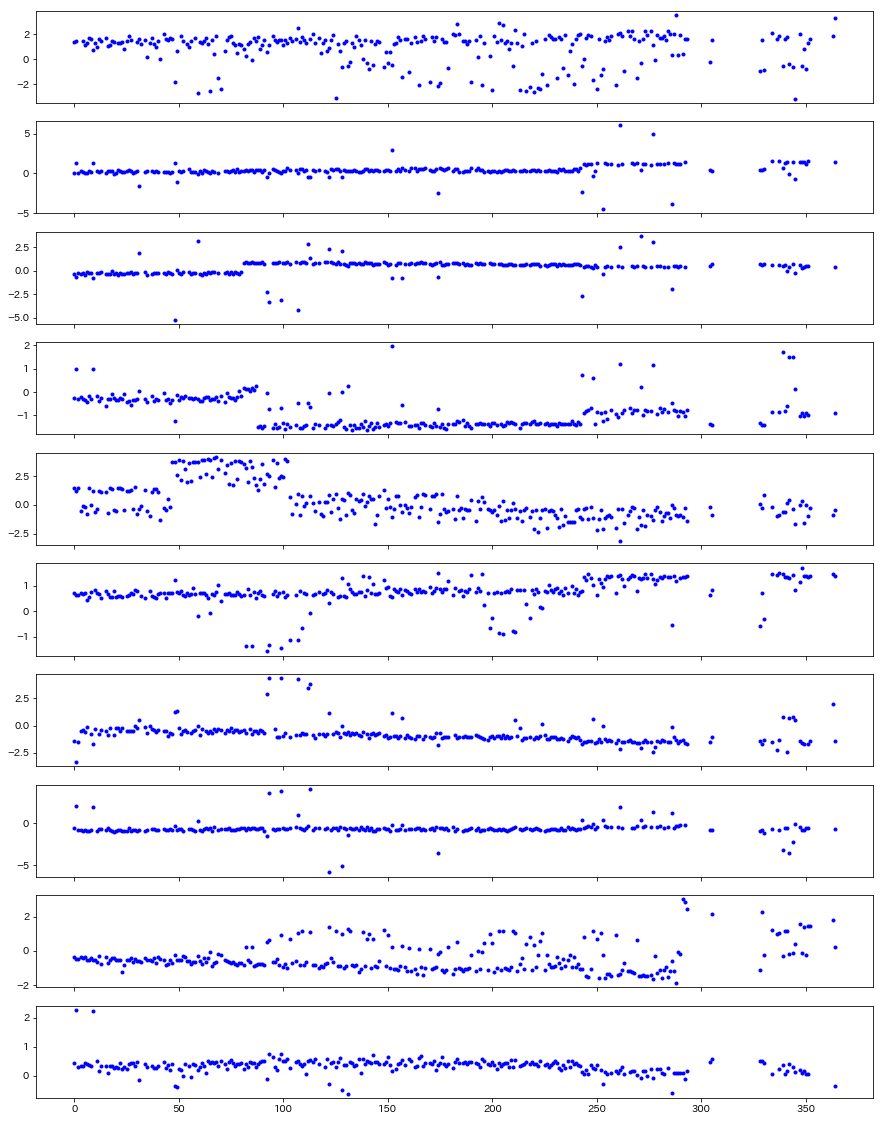

In [28]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左replace']]
    data = data.dropna(subset=['高低左replace'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低左replace'], marker='.', linewidth=0, c='b')

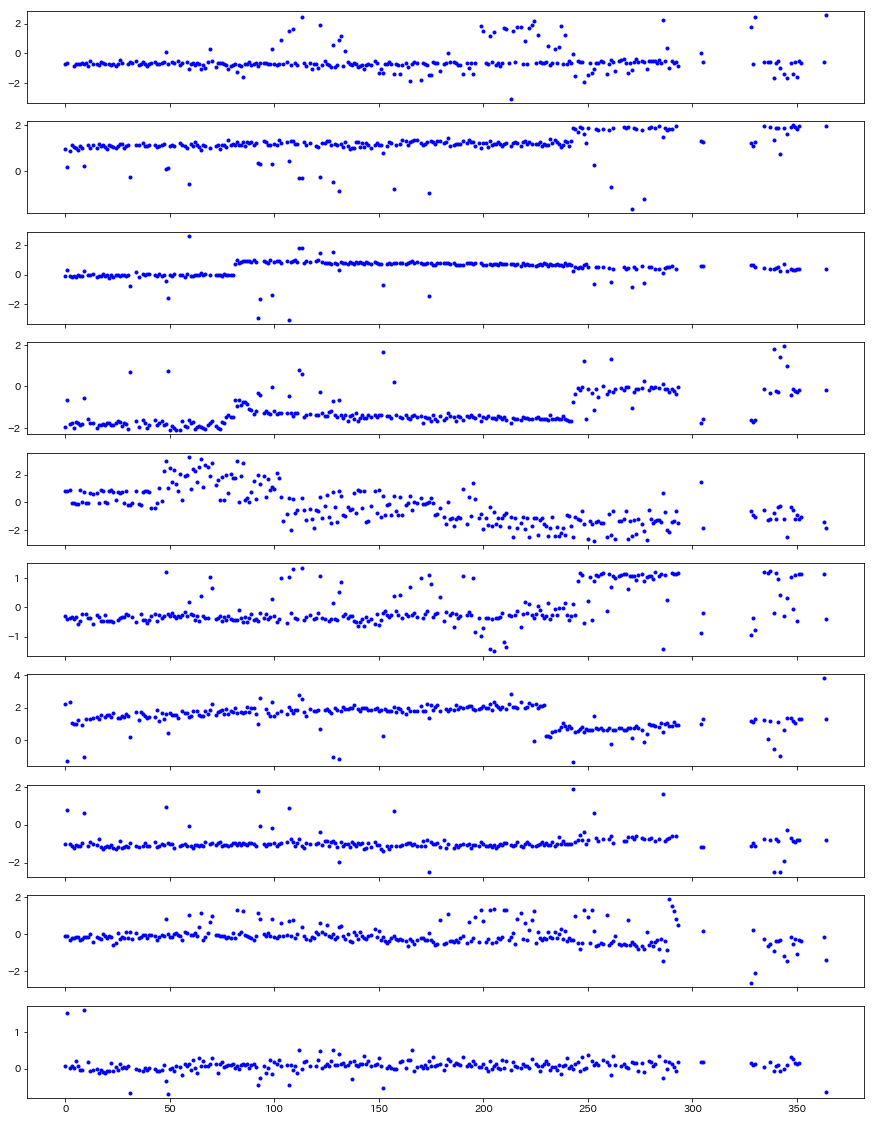

In [30]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左', '高低左replace']]
    data = data.dropna(subset=['高低左', '高低左replace'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低左replace'] - data['高低左'], marker='.', linewidth=0, c='b')